In [2]:
import arviz as az
from tms_risk.cogmodels.fit_probit import build_model, get_data
from tms_risk.cogmodels.utils import extract_intercept_gamma, format_bambi_ppc, plot_ppc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltG
import arviz as az
import os.path as op
import pingouin as pg
from IPython.display import display
import matplotlib.pyplot as plt

sns.set_theme('paper', 'white', font='helvetica', font_scale=2, palette='tab10')

bids_folder = '/data/ds-tmsrisk'

stimulation_palette = sns.color_palette()[2:4]
stimulation_order = ['vertex', 'ips']

In [3]:
import bambi
bambi.__version__

'0.13.0'

In [4]:
# model_label = 'probit_simple_model_session'
model_label = 'probit_full'

In [4]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

KeyboardInterrupt: 

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_85623/3417272270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_85623/3417272270.py:5: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])


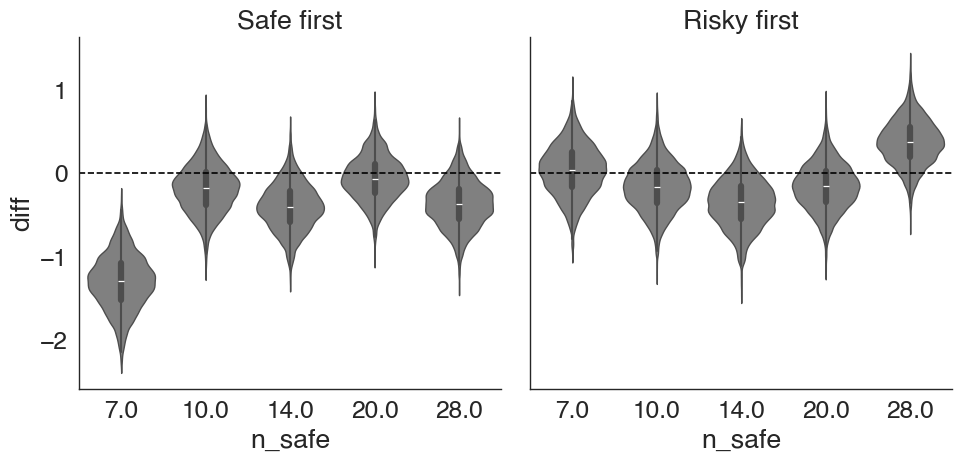

In [ ]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

In [ ]:
data['n1_bin'] = data.groupby('subject')['n1'].transform(lambda x: pd.qcut(x, 6, labels=['bin{n}'.format(n=n) for n in range(1, 7)]))

In [ ]:
data

stimulation_condition        rt    n1    n2  \
subject session run trial_nr                                               
1       2       1   1                       vertex  1.239692  28.0  86.0   
                    2                       vertex  0.836219   7.0  21.0   
                    3                       vertex  0.931371   7.0  21.0   
                    4                       vertex  1.135164  10.0  24.0   
                    5                       vertex  1.032161  20.0  44.0   
...                                            ...       ...   ...   ...   
74      3       6   116                     vertex  1.055890  37.0  20.0   
                    117                     vertex  0.739095  55.0  14.0   
                    118                     vertex  0.371731  22.0  20.0   
                    119                     vertex  0.705755  14.0  10.0   
                    120                     vertex  0.672241  15.0  14.0   

                                p1    p2  choice  risky_first  chose_risky  \
subject session run trial_nr                                                 
1       2       1   1         1.00  0.55     2.0        False         True   
                    2         1.00  0.55     2.0        False         True   
                    3         1.00  0.55     2.0        False         True   
                    4         1.00  0.55     1.0        False        False   
                    5         1.00  0.55     1.0        False        False   
...                            ...   ...     ...          ...          ...   
74      3       6   116       0.55  1.00     2.0         True        False   
                    117       0.55  1.00     2.0         True        False   
                    118       0.55  1.00     2.0         True        False   
                    119       0.55  1.00     2.0         True        False   
                    120       0.55  1.00     2.0         True        False   

                              n_risky  n_safe      frac  log(risky/safe)  \
subject session run trial_nr                                               
1       2       1   1            86.0    28.0  3.071429         1.122143   
                    2            21.0     7.0  3.000000         1.098612   
                    3            21.0     7.0  3.000000         1.098612   
                    4            24.0    10.0  2.400000         0.875469   
                    5            44.0    20.0  2.200000         0.788457   
...                               ...     ...       ...              ...   
74      3       6   116          37.0    20.0  1.850000         0.615186   
                    117          55.0    14.0  3.928571         1.368276   
                    118          22.0    20.0  1.100000         0.095310   
                    119          14.0    10.0  1.400000         0.336472   
                    120          15.0    14.0  1.071429         0.068993   

                               log(n1) bin(risky/safe)         x  session3  \
subject session run trial_nr                                                 
1       2       1   1         3.332205             80%  1.122143         0   
                    2         1.945910             80%  1.098612         0   
                    3         1.945910             80%  1.098612         0   
                    4         2.302585             44%  0.875469         0   
                    5         2.995732             44%  0.788457         0   
...                                ...             ...       ...       ...   
74      3       6   116       3.610918             44%  0.615186         1   
                    117       4.007333             80%  1.368276         1   
                    118       3.091042             20%  0.095310         1   
                    119       2.639057             32%  0.336472         1   
                    120       2.708050             20%  0.068993         1   

                     

# N1 magnitude model

In [ ]:
import scipy.stats as ss
model_label = 'probit_n1_full'

def invprobit(x):
    return ss.norm.ppf(x)

In [ ]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

Dropping the baseline condition


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_98519/2511405793.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_98519/2511405793.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


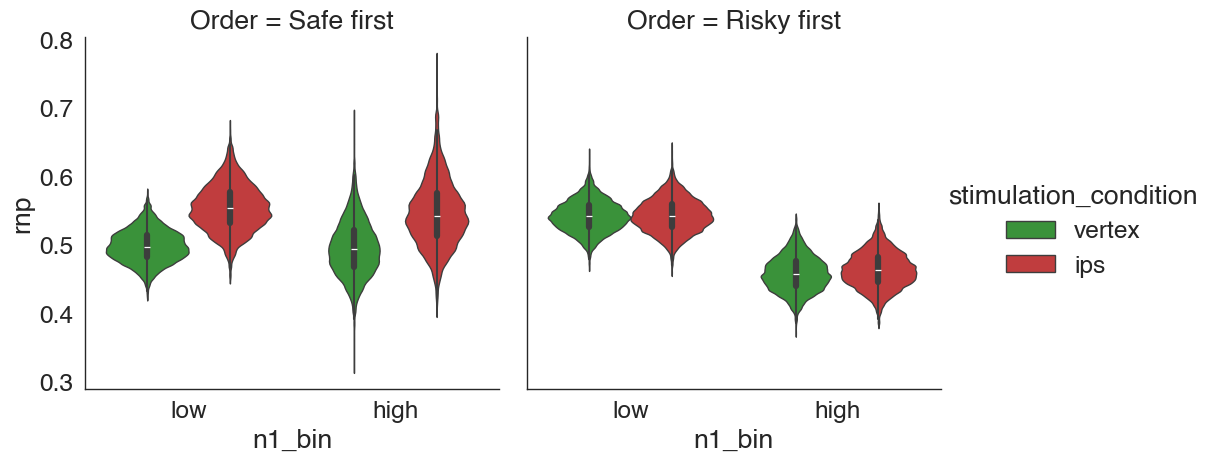

In [ ]:
sns.catplot(x='n1_bin', y='rnp', col='Order', data=rnp.reset_index(), kind='violin', hue='stimulation_condition', palette=stimulation_palette)

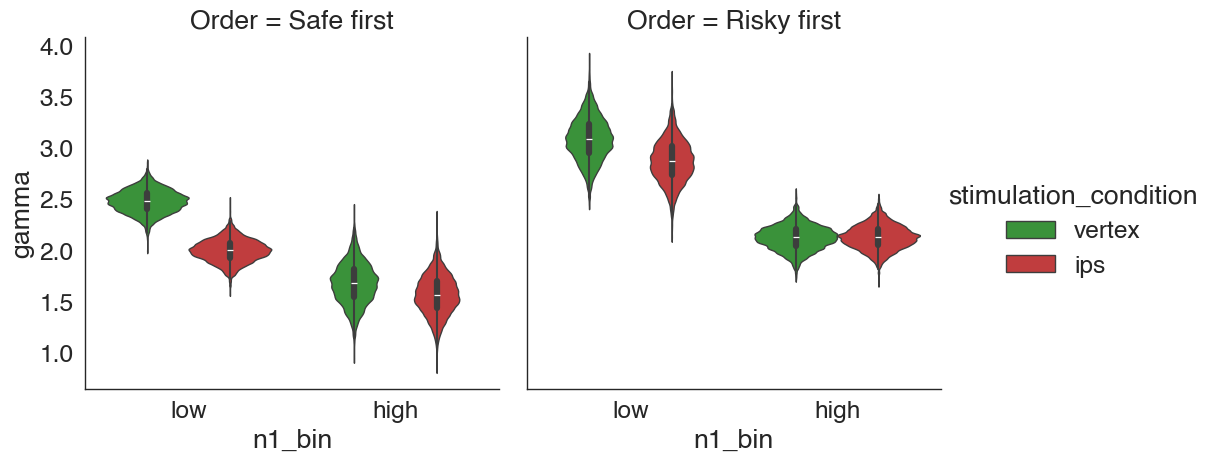

In [ ]:
sns.catplot(x='n1_bin', y='gamma', hue='stimulation_condition', col='Order', data=gamma.reset_index(), kind='violin', palette=stimulation_palette)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_98519/4026267150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='n1_bin', y='diff', col='Order', data=gamma_diff.reset_index(), kind='violin', palette=['gray'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_98519/4026267150.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(x='n1_bin', y='diff', col='Order', data=gamma_diff.reset_index(), kind='violin', palette=['gray'])


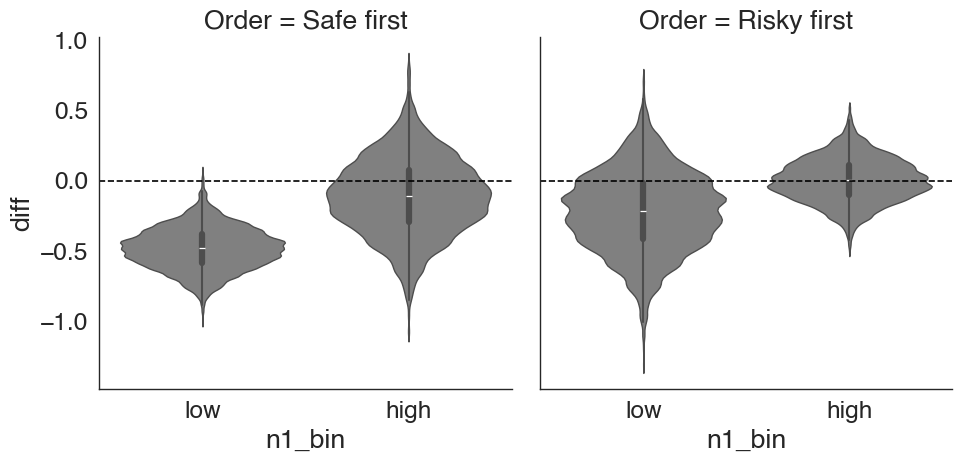

In [ ]:
gamma_diff = gamma.unstack(['stimulation_condition'])['gamma']
gamma_diff = (gamma_diff['ips'] - gamma_diff['vertex']).to_frame('diff')
g = sns.catplot(x='n1_bin', y='diff', col='Order', data=gamma_diff.reset_index(), kind='violin', palette=['gray'])

g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))




In [ ]:
data.groupby(['risky_first', 'n1_bin'])['n1'].mean()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_98519/2944711651.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['risky_first', 'n1_bin'])['n1'].mean()


risky_first  n1_bin
False        low       12.723294
             high      26.954995
True         low       15.252467
             high      44.741925
Name: n1, dtype: float64

# Average n model

In [5]:
import scipy.stats as ss
model_label = 'probit_average_n_full'

In [6]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

Dropping the baseline condition


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/2511405793.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/2511405793.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


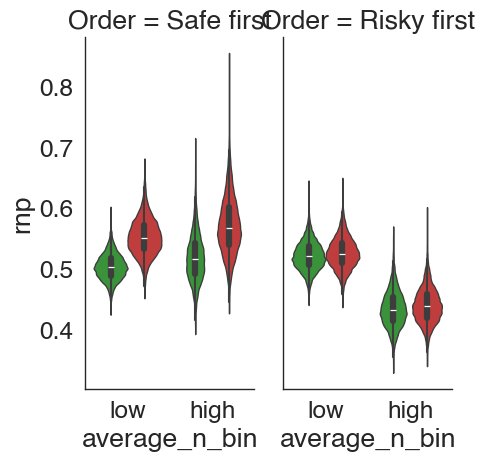

In [7]:
sns.catplot(x='average_n_bin', y='rnp', col='Order', data=rnp.reset_index(), kind='violin', hue='stimulation_condition', palette=stimulation_palette, aspect=.5, legend=False)

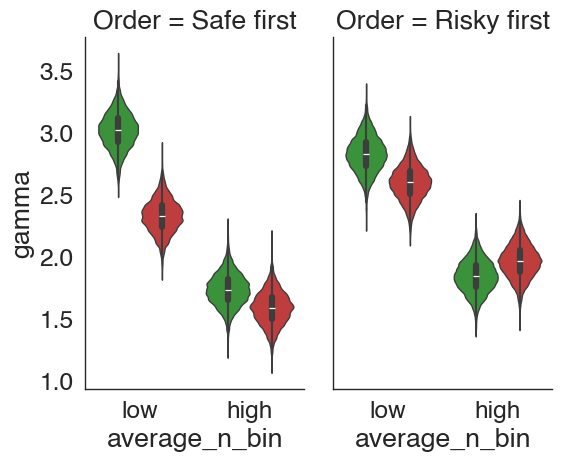

In [8]:
sns.catplot(x='average_n_bin', y='gamma', hue='stimulation_condition', col='Order', data=gamma.reset_index(), kind='violin', palette=stimulation_palette, aspect=.6, legend=False)

In [9]:
display(gamma.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['gamma'].mean())

display(gamma.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['gamma'].apply(lambda x: pd.Series(az.hdi(x.values, hdi_prob=.95), index=['lower', 'upper'])))


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/2335111668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(gamma.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['gamma'].mean())


Order        stimulation_condition  average_n_bin
Risky first  ips                    low              2.602558
                                    high             1.967498
             vertex                 low              2.833626
                                    high             1.846727
Safe first   ips                    low              2.333365
                                    high             1.590265
             vertex                 low              3.024304
                                    high             1.738662
Name: gamma, dtype: float64

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/2335111668.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(gamma.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['gamma'].apply(lambda x: pd.Series(az.hdi(x.values, hdi_prob=.95), index=['lower', 'upper'])))


Order        stimulation_condition  average_n_bin       
Risky first  ips                    low            lower    2.324229
                                                   upper    2.877637
                                    high           lower    1.711010
                                                   upper    2.245161
             vertex                 low            lower    2.552162
                                                   upper    3.116566
                                    high           lower    1.592250
                                                   upper    2.113632
Safe first   ips                    low            lower    2.081477
                                                   upper    2.619455
                                    high           lower    1.330074
                                                   upper    1.854828
             vertex                 low            lower    2.733098
                                              

In [10]:
display(rnp.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['rnp'].mean())

display(rnp.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['rnp'].apply(lambda x: pd.Series(az.hdi(x.values, hdi_prob=.95), index=['lower', 'upper'])))


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/3429319556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(rnp.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['rnp'].mean())


Order        stimulation_condition  average_n_bin
Risky first  ips                    low              0.527346
                                    high             0.440809
             vertex                 low              0.522685
                                    high             0.435470
Safe first   ips                    low              0.553873
                                    high             0.572865
             vertex                 low              0.504682
                                    high             0.519060
Name: rnp, dtype: float64

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/3429319556.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(rnp.groupby(['Order', 'stimulation_condition', 'average_n_bin'])['rnp'].apply(lambda x: pd.Series(az.hdi(x.values, hdi_prob=.95), index=['lower', 'upper'])))


Order        stimulation_condition  average_n_bin       
Risky first  ips                    low            lower    0.477728
                                                   upper    0.579470
                                    high           lower    0.390151
                                                   upper    0.503639
             vertex                 low            lower    0.477433
                                                   upper    0.570249
                                    high           lower    0.377277
                                                   upper    0.494042
Safe first   ips                    low            lower    0.495708
                                                   upper    0.614978
                                    high           lower    0.484220
                                                   upper    0.671271
             vertex                 low            lower    0.464321
                                              

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/3467726237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=rnp_diff.reset_index(), kind='violin', palette=['gray'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/3467726237.py:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=rnp_diff.reset_index(), kind='violin', palette=['gray'])


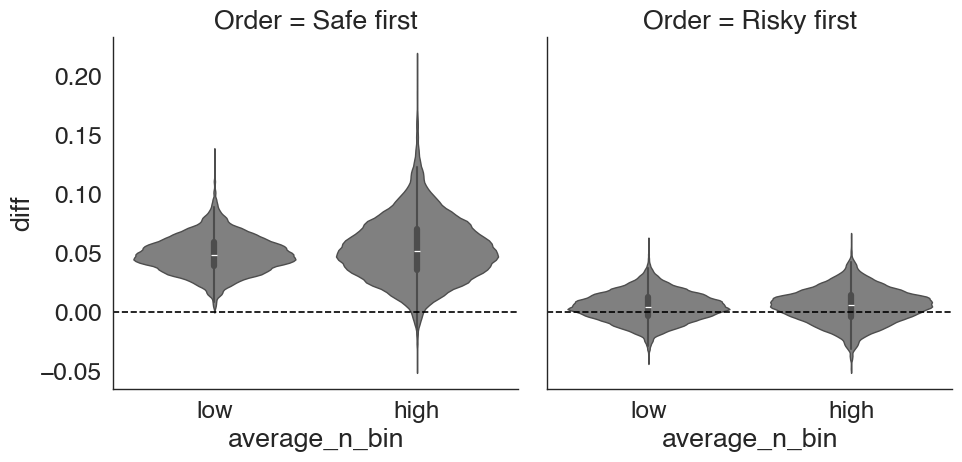

In [11]:
rnp_diff = rnp.unstack(['stimulation_condition'])['rnp']
rnp_diff = (rnp_diff['ips'] - rnp_diff['vertex']).to_frame('diff')

g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=rnp_diff.reset_index(), kind='violin', palette=['gray'])

g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))


In [12]:
rnp_diff.groupby(['Order', 'average_n_bin']).apply(lambda x: (x<0.0).mean())

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/4150032163.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rnp_diff.groupby(['Order', 'average_n_bin']).apply(lambda x: (x<0.0).mean())


diff
Order       average_n_bin          
Risky first low            0.353875
            high           0.342750
Safe first  low            0.000000
            high           0.011750

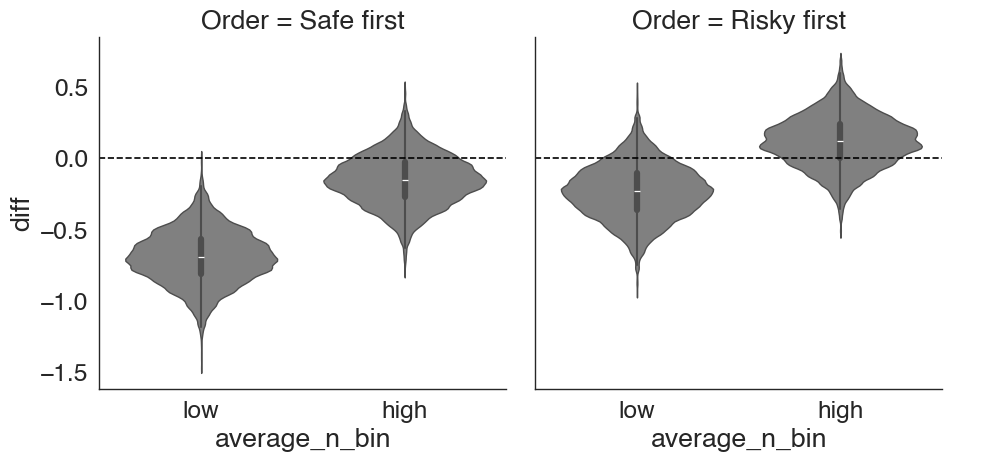

In [13]:
gamma_diff = gamma.unstack(['stimulation_condition'])['gamma']
gamma_diff = (gamma_diff['ips'] - gamma_diff['vertex']).to_frame('diff')
g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=gamma_diff.reset_index(), kind='violin', color='gray')

g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))


In [14]:
gamma_diff.groupby(['average_n_bin', 'Order']).apply(lambda d: (d>0.0).mean())

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_90007/1778069234.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gamma_diff.groupby(['average_n_bin', 'Order']).apply(lambda d: (d>0.0).mean())


diff
average_n_bin Order                
low           Risky first  0.111000
              Safe first   0.000250
high          Risky first  0.752125
              Safe first   0.204000

In [15]:
gamma_diff.groupby(['average_n_bin', 'Order']).size()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_6427/2965361835.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gamma_diff.groupby(['average_n_bin', 'Order']).size()


average_n_bin  Order      
low            Risky first    80000
               Safe first     80000
high           Risky first    80000
               Safe first     80000
dtype: int64

In [ ]:
gamma_diff.groupby(['average_n_bin', 'Order']).apply(lambda d: (d<0.0).mean())

NameError: name 'gamma_diff' is not defined

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/775711064.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.FacetGrid(data=data.groupby(['subject', 'stimulation_condition', 'Order', 'bin(risky/safe)', 'average_n_bin'])['chose_risky'].mean().reset_index(),


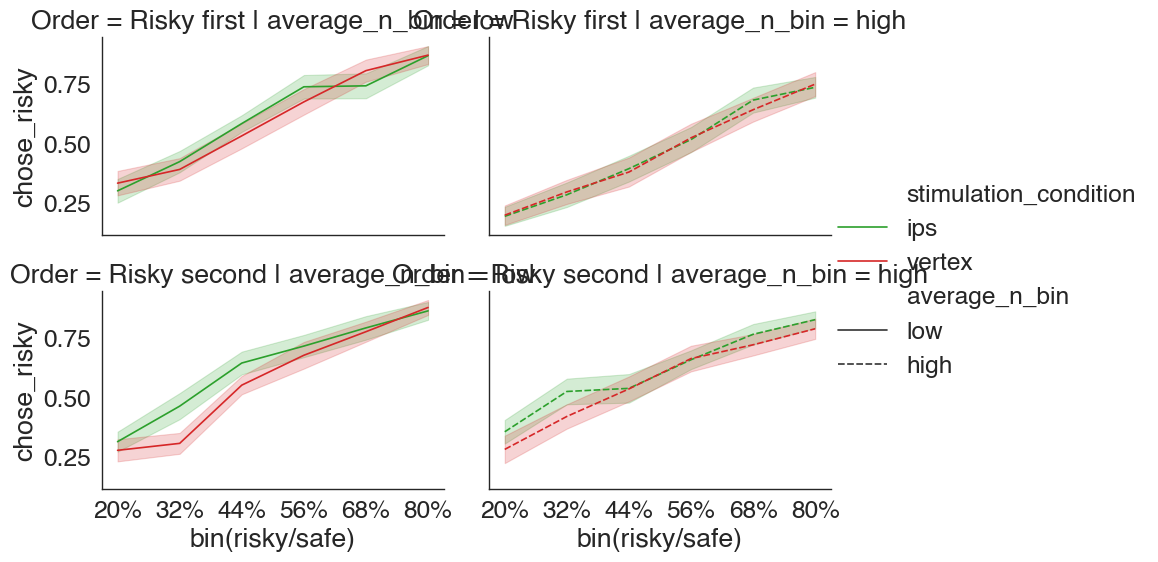

In [42]:
data['bin(risky/safe)'] = pd.Categorical(data['bin(risky/safe)'], ordered=True)
data['Order'] = data['risky_first'].map({True:'Risky first', False:'Risky second'})
g = sns.FacetGrid(data=data.groupby(['subject', 'stimulation_condition', 'Order', 'bin(risky/safe)', 'average_n_bin'])['chose_risky'].mean().reset_index(),
                   row='Order', height=3, aspect=1.5, palette=stimulation_palette, col='average_n_bin')

g.map_dataframe(sns.lineplot, x='bin(risky/safe)', y='chose_risky', style='average_n_bin', errorbar='se', hue='stimulation_condition', palette=stimulation_palette)

g.add_legend()

/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gdehol/mambaforge/envs/tms_risk/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


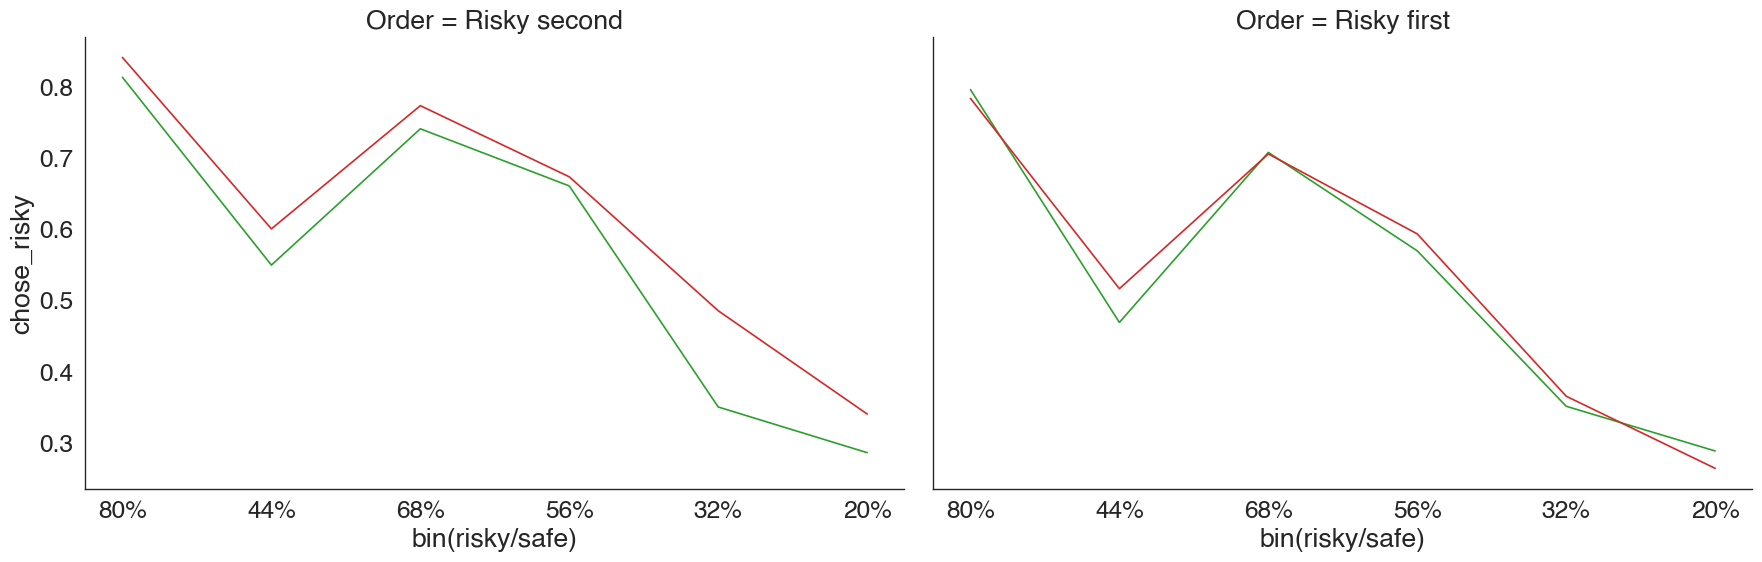

In [ ]:
data['Order'] = data['risky_first'].map({True:'Risky first', False:'Risky second'})

data['bin(risky/safe)'] = pd.Categorical


g = sns.FacetGrid(hue='stimulation_condition', col='Order', data=data.reset_index(), height=6, aspect=1.5, palette=stimulation_palette)

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', ci=None)
# sns.relplot(x='bin(risky/safe)', y='chose_risky', hue='stimulation_condition', col='Order', data=data, kind='line', palette=stimulation_palette,)

# 3 bins of average n

In [92]:
import scipy.stats as ss
model_label = 'probit_average_n3_full'

data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

Dropping the baseline condition


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/2284579271.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/2284579271.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


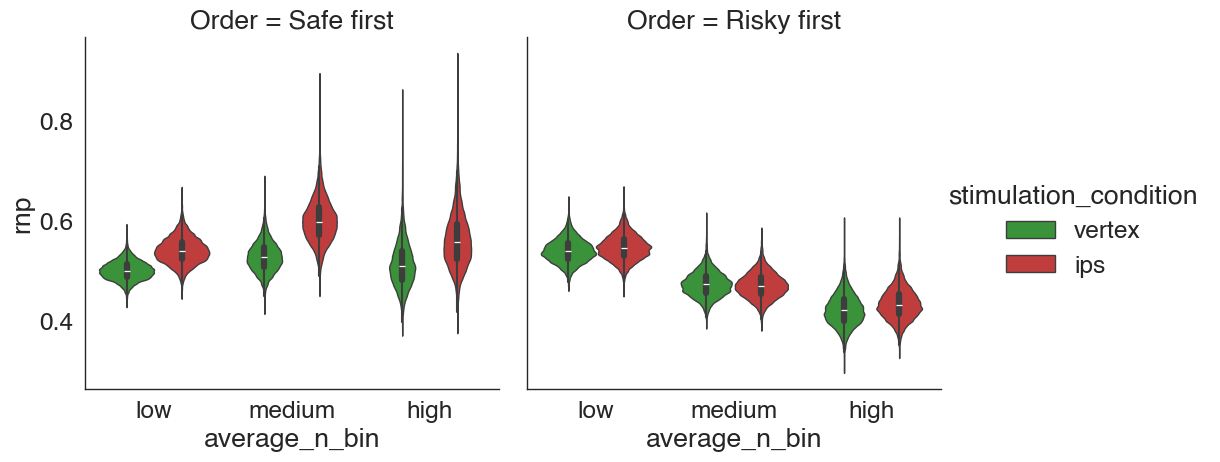

In [93]:
sns.catplot(x='average_n_bin', y='rnp', col='Order', data=rnp.reset_index(), kind='violin', hue='stimulation_condition', palette=stimulation_palette)

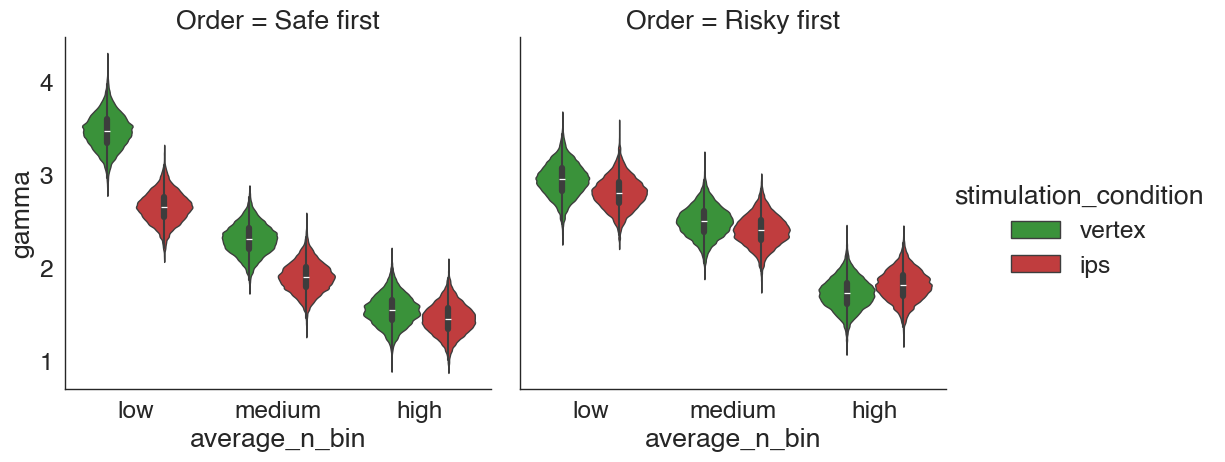

In [94]:
sns.catplot(x='average_n_bin', y='gamma', hue='stimulation_condition', col='Order', data=gamma.reset_index(), kind='violin', palette=stimulation_palette)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/635711890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=rnp_diff.reset_index(), kind='violin', palette=['gray'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/635711890.py:4: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=rnp_diff.reset_index(), kind='violin', palette=['gray'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/635711890.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default

diff
Order       average_n_bin          
Risky first low            0.326125
            medium         0.567625
            high           0.257875
Safe first  low            0.002000
            medium         0.001000
            high           0.065625

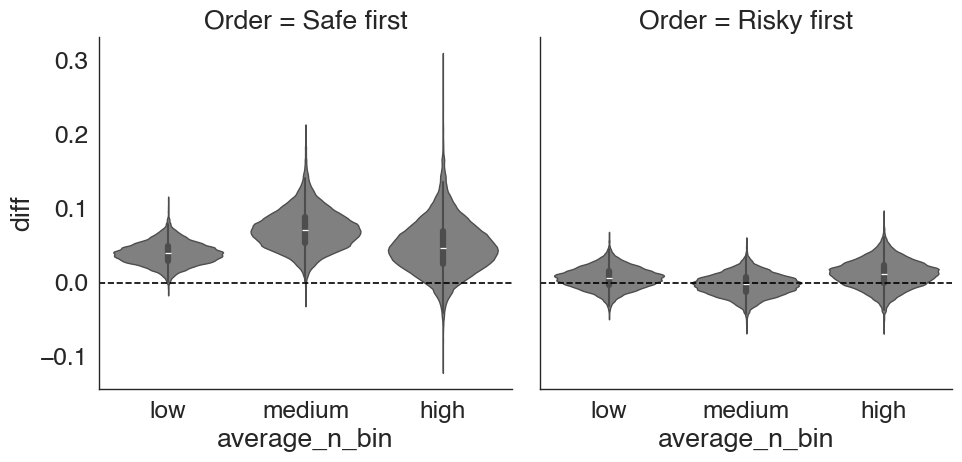

In [99]:
rnp_diff = rnp.unstack(['stimulation_condition'])['rnp']
rnp_diff = (rnp_diff['ips'] - rnp_diff['vertex']).to_frame('diff')

g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=rnp_diff.reset_index(), kind='violin', palette=['gray'])

g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

rnp_diff.groupby(['Order', 'average_n_bin']).apply(lambda d: (d<0.0).mean())

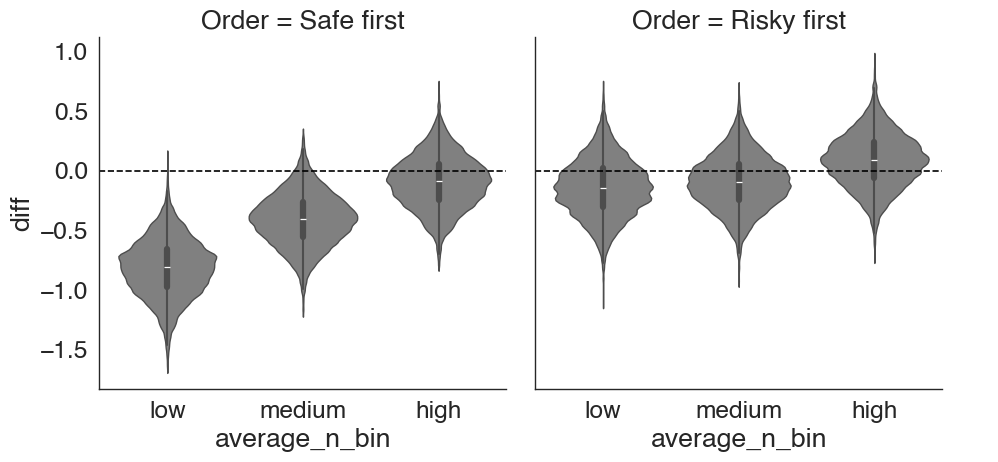

In [100]:
gamma_diff = gamma.unstack(['stimulation_condition'])['gamma']
gamma_diff = (gamma_diff['ips'] - gamma_diff['vertex']).to_frame('diff')
g = sns.catplot(x='average_n_bin', y='diff', col='Order', data=gamma_diff.reset_index(), kind='violin', color='gray')

g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))


In [101]:
gamma_diff.groupby(['risky_first', 'average_n_bin'])['diff'].apply(lambda x: (x>0.0).mean())

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/3458447765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gamma_diff.groupby(['risky_first', 'average_n_bin'])['diff'].apply(lambda x: (x>0.0).mean())


risky_first  average_n_bin
False        low              0.000250
             medium           0.032125
             high             0.339625
True         low              0.272875
             medium           0.335875
             high             0.649375
Name: diff, dtype: float64

In [102]:
data['bin(risky/safe)'] = pd.Categorical(data['bin(risky/safe)'], ordered=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_303/2746236144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.FacetGrid(data=data.groupby(['subject', 'stimulation_condition', 'Order', 'bin(risky/safe)', 'average_n_bin'])['chose_risky'].mean().reset_index(),


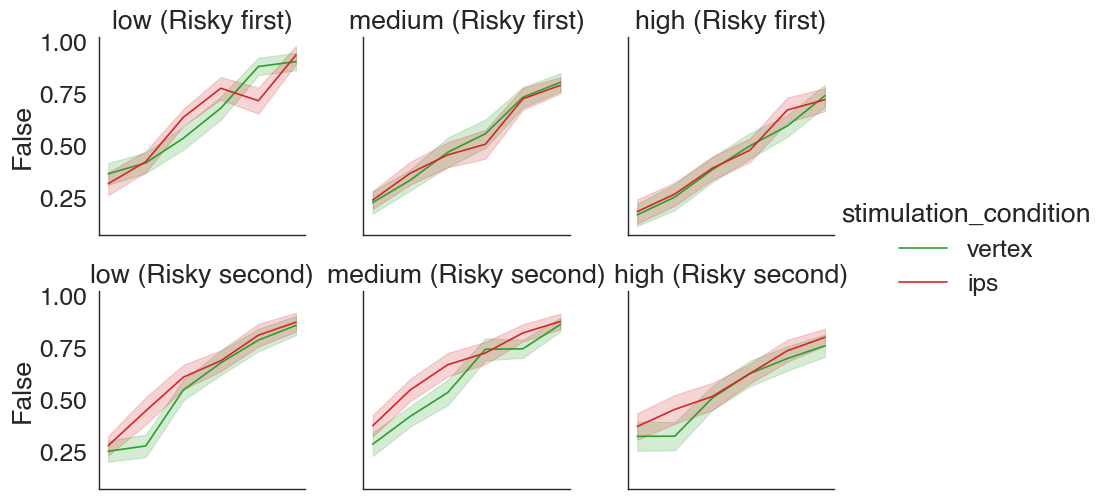

In [103]:
data['Order'] = data['risky_first'].map({True:'Risky first', False:'Risky second'})
g = sns.FacetGrid(data=data.groupby(['subject', 'stimulation_condition', 'Order', 'bin(risky/safe)', 'average_n_bin'])['chose_risky'].mean().reset_index(),
                   row='Order', height=3, aspect=1.0, palette=stimulation_palette, col='average_n_bin', hue='stimulation_condition', hue_order=stimulation_order)

g.map_dataframe(sns.lineplot, x='bin(risky/safe)', y='chose_risky', errorbar='se')

g.set(xlabel=None, xticks=[], ylabel=False)
g.set_titles('{col_name} ({row_name})')
g.add_legend()